# Constrained Optimization

1. Equality Constrained Optimization
    * Lagrange multiplier
2. Inequality Constrained Optimization
    * Steepest descent
    * Newton's method
    * Quasi-Newton method
        * Broyden-Fletcher-Goldfarb-Shanno (BFGS)
        * [Penalty method](#first-bullet1)


## Penalty Method <a class="anchor" id="first-bullet1"></a>

Penalty method converts a constrained problem into an unconstrained problem, by introducing a new objective function which is a weighted sum of objective function and constraint. The method is illustrated below.

Given the constrained minimization problem:

$$
\min_x f(x) \quad \text{subject to} \quad g(x) = 0 \quad (*)
$$

we can consider the corresponding unconstrained problem:

$$
\min_x \phi_\rho(x) = f(x) + {1\over 2} \rho g(x)^Tg(x) \quad (**)
$$

Let $x^*$ and $x^*_{\rho}$ denote the solution of $(*)$ and $(**)$, respectively.

Under appropriate conditions, it can be shown that we can solve the unconstrained problem for a large value of $\rho$ to get a good approximation of $x^*$.

$$
\lim_{\rho \rightarrow \infty} x_\rho^* = x^*
$$

Although penalty method can be convenient and simple, the major drawback of it is that a large $\rho$ will increase the condition number of the Hessian $H_{\phi_{\rho}}$

---


The following program uses Penalty method to solve the optimization problem:

Minimize 

$$
f(x,y) = x+ y
$$

subject to

$$
g(x,y) = 2x^2 + y^2 - 5 = 0
$$

which has local minimum at

$$
(x,y) = \left(- \sqrt{5\over 6}, -\sqrt{10\over 3}\right)
$$

To implement the Penalty method we consider finding the local minimum of 

$$
\phi_\rho(x,y) = f(x,y) + {\rho[g(x,y)]^2\over 2}
$$

where $\rho$ is a constant. 

As $\rho$ increases from 0, the minumum of $\phi_\rho$ becomes closer to the minimum of $f$ on $S$ ($S$ is the feasible set where $g(x,y)=0$). So the penalty method gives a better and better approximation to the solution of the constrained minimization problem. The $\phi_\rho$ grows rapidly as being far from the $S$, so we penalize the possibility for the local minimum to lie far away from the $S$. As $\rho$ increases, the local minimum must be closer to the $S$.

In [1]:
import numpy as np

# Store values for visualization
zs0 = []
zs1 = []
fs = []
rhos = []
avghcs = []
phis = []

# Objective function, gradient, and Hessian
def f(x,y): return x+y
def grad_f(x,y): return np.array([1.,1.])
def hess_f(x,y): return np.zeros((2,2))

# Constraint function, gradient, and Hessian
def g(x,y): return 2*x*x+y*y-5
def grad_g(x,y): return np.array([4*x,2*y])
def hess_g(x,y): return np.array([[4.,0.],[0.,2.]])

# Penalty function (phi)
def phi(x,y,rho):
    g0=g(x,y)
    return f(x,y)+0.5*rho*g0*g0

# Gradient of penalty function (phi)
def grad_phi(x,y,rho):
    return grad_f(x,y)+rho*g(x,y)*grad_g(x,y)

# Hessian of penalty function (phi)
def hess_phi(x,y,rho):
    gg=grad_g(x,y)
    return hess_f(x,y)+rho*(g(x,y)*hess_g(x,y)+np.outer(gg,gg))

# Find stationary point of penalty function (phi)
def solve(z,rho):
    s=1e10
    sumhc=0;n=0

    # Do Newton steps until size falls below 1e-12
    while np.linalg.norm(s)>1e-12:

        # Compute condition number of Hessian to store its average value
        hphi=hess_phi(z[0],z[1],rho)
        sumhc+=np.linalg.cond(hphi);n+=1

        # Perform Newton step
        s=np.linalg.solve(hphi,-grad_phi(z[0],z[1],rho))
        z+=s
    return (z,sumhc/n,n)

# Loop over a range of values of rho
rho=1e-3
z=np.array([-1.,-1.])
while rho<1e13:

    # Solve with the given rho. 
    # Print the solution, the average condition number of the Hessian, and the number of Newton steps.
    (z,avghc,n)=solve(z,rho)
    print(rho,z[0],z[1],avghc,n)
    zs0.append(z[0])
    zs1.append(z[1])
    fs.append(g(z[0],z[1]))
    rhos.append(rho)
    avghcs.append(avghc)
    phis.append(phi(z[0],z[1],rho))

    rho*=10

0.001 -3.546917410692823 -7.093834821385646 4.757571519838671 15
0.01 -1.7811808935798195 -3.562361787159639 3.4764300890845923 7
0.1 -1.1008335066035222 -2.2016670132070444 5.906022354189431 7
1.0 -0.9369128198046379 -1.8738256396092758 27.896443557792676 6
10.0 -0.9153607337100467 -1.8307214674200933 255.28399617988643 5
100.0 -0.91312082655223 -1.82624165310446 2493.474458817578 4
1000.0 -0.9128959281483721 -1.8257918562967441 22688.29200301766 3
10000.0 -0.9128734291650071 -1.8257468583300143 227171.22622595425 3
100000.0 -0.9128711791751742 -1.8257423583503483 2272002.0918474416 3
1000000.0 -0.9128709541752758 -1.8257419083505517 17851647.99145959 2
10000000.0 -0.9128709316752769 -1.8257418633505538 178516930.68747118 2
100000000.0 -0.9128709294252769 -1.8257418588505536 1785169722.9492946 2
1000000000.0 -0.9128709292002769 -1.8257418584005538 17851744409.3285 2
10000000000.0 -0.9128709291777769 -1.8257418583555538 178517447085.37054 2
100000000000.0 -0.9128709291755269 -1.8257418

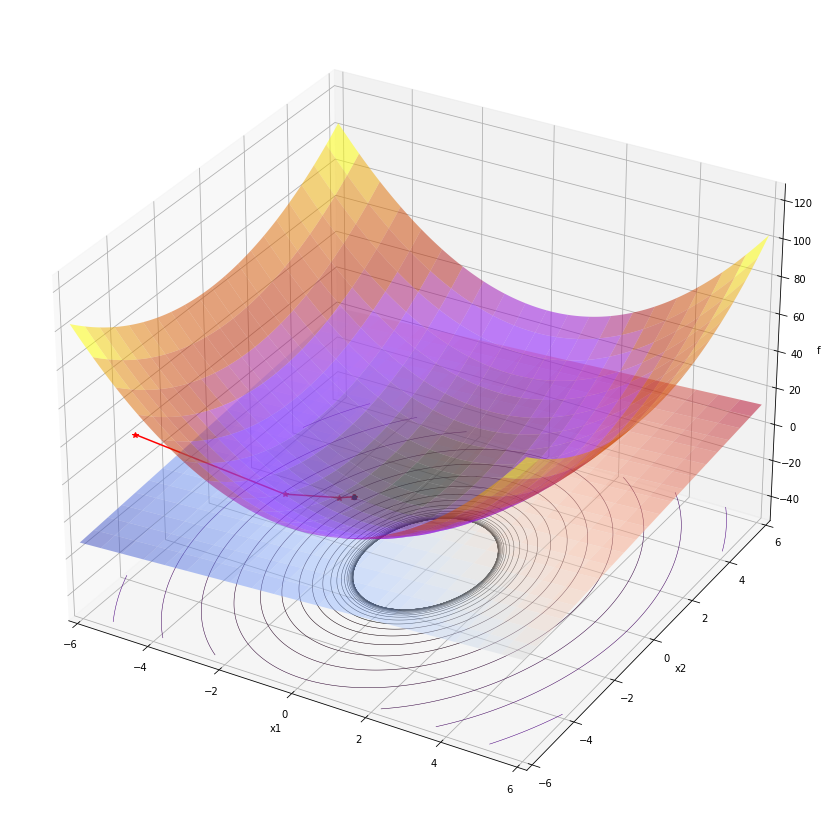

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# plotting
ax=plt.figure(figsize=(20,15)).add_subplot(projection='3d')
x1 = np.linspace(-6,6,1000)
x2 = np.linspace(-6,6,1000)
X1, X2 = np.meshgrid(x1,x2)

minpoint = [-np.sqrt(5/6), -np.sqrt(10/3), g(-np.sqrt(5/6), -np.sqrt(10/3))]

# plot 3d surface
ax.plot_surface(X1,X2,g(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap=plt.cm.gnuplot)
ax.plot_surface(X1,X2,f(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap="coolwarm")


# plot a projection of the contours for the z dimension.
levels = np.logspace(-3,3,40)
ax.contour(X1,X2, g(X1,X2), zdir='z', offset=-50, linewidths=0.5,
          levels = levels, cmap=plt.cm.gnuplot)
ax.scatter(minpoint[0],minpoint[1],minpoint[2], color='k')
ax.plot(zs0, zs1, fs, color = 'r', marker='*')

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-50,125)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

plt.show()


We can see from the first plot that there is a parallel/linear relationship between the $\rho$ and the average Hessian condition number in the log-log scale. We can see from the second plot that the accuracy of the penalty method solution to the exact solution to the constrained problem is inversely proportional to $\rho$.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

domain0 = np.linspace(min(rhos), max(rhos), 100)
axes[0].plot(np.log(rhos), np.log(avghcs), marker = "*", 
         label = "rho vs. cn")
axes[0].plot(np.log(domain0), np.log(domain0), label = r"$y=x$")
axes[0].set_title("rho vs. condition number in log-log scale")
axes[0].set_xlabel("log rho")
axes[0].set_ylabel(" log avg Hessian condition number")
axes[0].legend()

axes[1].plot(np.log(rhos), np.log(abs(zs0 + np.sqrt(5/6))),
             marker = "*", label = "rho vs. error")
axes[1].plot(np.log(domain0), np.log(1/domain0), label = r"$y=1/x$")
axes[1].set_title("rho vs. error in log-log scale")
axes[1].set_xlabel("log rho")
axes[1].set_ylabel("log error in first solution component")
axes[1].legend()